In [52]:
import pandas as pd
import re

In [53]:
from bertopic import BERTopic

In [55]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
print(sentiment_analysis("I love this!"))

Some weights of RobertaModel were not initialized from the model checkpoint at siebert/sentiment-roberta-large-english and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[{'label': 'POSITIVE', 'score': 0.9988656640052795}]


In [ ]:
df = pd.read_csv("data_EU_w_text.csv")

In [ ]:
df=df.iloc[:,1:]

In [56]:
# df=pd.read_csv("exploded2.csv")

In [58]:
# df=pd.read_csv("data_EU_full.csv")
# df[df.columns[[4,5,6,7,8,9,14]]].to_excel("about_labels.xlsx")

In [59]:
df["Fulltext"].fillna(df["Message"], inplace=True)

In [60]:
df.Fulltext=df.Fulltext.str.replace('\xa0', '')

In [61]:
df.Fulltext=df.Fulltext.str.replace(r' {2,}', ' ')

In [62]:
df.Fulltext=df.Fulltext.str.replace(r'[\n|\t|\r] ', '\n')

In [63]:
regex_prgph_esp = re.compile(r'([\n|\t|\r]{1,}( |\t)*[\n|\t|\r]){1,}')

In [64]:
df.Fulltext=df.Fulltext.str.replace(regex_prgph_esp, '\n\n')

In [65]:
regex_multipar = re.compile(r'([\n|\t|\r]{2,})')

In [66]:
df.Fulltext=df.Fulltext.str.replace(regex_multipar, '\n\n')

In [67]:
df["Fulltext"]=df["Fulltext"].str.replace(r'[\n|\t|\r]{1,}(?=([a-z]|[[:punct:]]))', '', flags=re.DOTALL)

In [68]:
# Fct pour Retirer les liens
def remove_html(text_data):
  txt = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', str(text_data))
  #soup = BeautifulSoup(txt, 'lxml')
  #txt = soup.get_text()
  return txt

In [69]:
df.Fulltext=df.Fulltext.apply(lambda x : remove_html(x))

In [70]:
# df.dropna(axis=0, subset=["Fulltext"]).to_csv("data_EU.csv", sep='\t')

In [71]:
#text_business = df[df["User type"]=="Business association"]["Fulltext"].dropna().str.join('')

In [72]:
#text_business = ' '.join(text_business)

In [73]:
#text_business = text_business.split('\n\n')

In [74]:
# model = BERTopic(nr_topics=40)
# topics, probabilities = model.fit_transform(text_business)

In [75]:
# probabilities

## ABOUT LABELS

https://regex101.com/r/4pTL5h/1/


In [76]:
import re

In [77]:
df.Fulltext = df.Fulltext.str.replace("labeling", "labelling")

In [78]:
# utiliser re.DOTALL ou pas ?

In [79]:
rx_labels = re.compile(r'((?:[\n|\t|\r]{1,}|^).*(?:label|Label).+?(?=[\n|\t|\r]{1,}[A-Z|1-9]))', flags=re.IGNORECASE | re.MULTILINE)

In [80]:
def get_paragraphs(keyword,text):
    list_pgphs = []
    for prgph in text.split('\n') :
        if keyword in prgph :
            list_pgphs.append(prgph)
    return "\n".join(list_pgphs)

In [81]:
df["About_labels"]=df["Fulltext"].dropna().apply(lambda x : get_paragraphs("label", x))

In [82]:
def is_empty_list(li) :
        if not li :
            return pd.NA
        else :
            return li

In [83]:
df["About_labels"]=df["About_labels"].apply(lambda x : is_empty_list(x))

In [84]:
df["IsLobby"] = pd.isna(df["Transparency register number"])
df["IsLobby"] = df["IsLobby"].astype(int)
# df[df["Transparency register number"].notna()]

In [85]:
df2 = df

In [86]:
df2["toexplode"] = df2.About_labels.split()

AttributeError: 'Series' object has no attribute 'split'

In [ ]:
df[df["Transparency register number"].notna()]

In [ ]:
df.to_csv("data_EU_full.csv")

### Pré processing

In [93]:
df

,Unnamed: 0,Feedback reference,Submitted on,Submitted by,User type,Organisation,Organisation size,Transparency register number,Scope,Country of origin,Initiative,Message,File,Fulltext,About_labels,IsLobby
0,0,F551055,10 September 2020,Douglas Johnson,Business association,Consumer Technology Association,Medium (50 to 249 employees),NaN,NaN,United States,Artificial intelligence – ethical and legal re...,CTA's comments are in the attached file.Feedba...,https://ec.europa.eu/info/law/better-regulatio...,"\n\nSeptember 10, 2020 \n\nConsumer Technolog...",<NA>,1
1,1,F551054,10 September 2020,Stan Adams,Non-governmental organisation (NGO),Center for Democracy & Technology,Small (10 to 49 employees),NaN,NaN,United States,Artificial intelligence – ethical and legal re...,CDT welcomes the opportunity to provide input ...,NaN,CDT welcomes the opportunity to provide input ...,<NA>,1
2,2,F551053,10 September 2020,Paolo Grassia,Business association,ETNO - European Telecommunications Network Ope...,Micro (1 to 9 employees),08957111909-85,NaN,Belgium,Artificial intelligence – ethical and legal re...,ETNO welcomes the Commission’s objective to fo...,https://ec.europa.eu/info/law/better-regulatio...,\n\nJune 2020 \n\nEuropean Commission's White...,Voluntary labelling \nA voluntary labelling fr...,0
3,3,F551052,10 September 2020,Ena Salihovic,Business association,EuroCommerce,Small (10 to 49 employees),NaN,NaN,Belgium,Artificial intelligence – ethical and legal re...,Artificial Intelligence (AI) can offer signifi...,https://ec.europa.eu/info/law/better-regulatio...,\nSeptember 2020 \n\nEuroCommerce contributio...,• A voluntary labelling scheme under Option 2 ...,1
4,4,F551051,10 September 2020,Michal Kardos,Business association,Slovak Alliance for Innovation Economy,Micro (1 to 9 employees),NaN,NaN,Slovakia,Artificial intelligence – ethical and legal re...,Smart government approaches to regulation will...,https://ec.europa.eu/info/law/better-regulatio...,Slovenská aliancia pre inovatívnu ekonomiku \n...,Option 2: EU legislative instrument setting up...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,149,F540758,04 August 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Artificial intelligence – ethical and legal re...,1.\tOpportunität eines Regulierungsrahmens für...,https://ec.europa.eu/info/law/better-regulatio...,"\n\nBerlin, 3. August 2020 \n\nDeutscher Indu...",<NA>,1
150,150,F540645,03 August 2020,patrick GRANT,Business association,BusinessEurope,Small (10 to 49 employees),3978240953-79,NaN,Belgium,Artificial intelligence – ethical and legal re...,BusinessEurope welcomes the positive tone of t...,https://ec.europa.eu/info/law/better-regulatio...,\n\nPOSITION PAPER \n\n15/07/20 \n\nAI: A Eur...,• A voluntary labelling system for AI not cove...,0
151,151,F539970,30 July 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Artificial intelligence – ethical and legal re...,I would like to express my support for the 2nd...,NaN,I would like to express my support for the 2nd...,I would like to express my support for the 2nd...,1
152,152,F539630,28 July 2020,Bart De Witte,EU citizen,NaN,NaN,NaN,NaN,Germany,Artificial intelligence – ethical and legal re...,As we had great concerns that the first releas...,NaN,As we had great concerns that the first releas...,<NA>,1


In [87]:
import spacy
# nlp_ru = spacy.load("ru_core_news_lg")
nlp_en = spacy.load("en_core_web_lg")

In [88]:
def lemm_en(text):
    nlp = nlp_en
    doc = nlp(text)
    #for token in doc:
    #print(token, token.lemma, token.lemma_)
    namelist = [name.lemma_ for name in doc.ents]
    tokens = [token.lemma_ for token in doc]
    # for token in doc:
    #     print(token.text, token.pos_, token.dep_)
    # for ent in doc.ents:
        # print(ent.text, ent.start_char, ent.end_char, ent.label_)
    return " ".join(tokens)

In [89]:
# Fct pour Retirer les emojis
RE_EMOJI = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
    "]+"
)
def remove_emoji(text):
    return RE_EMOJI.sub(r'', str(text))

In [90]:
#autres librairies nlp (pre processing...)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
from bs4 import BeautifulSoup
import re
#Preprocess function
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string
from nltk.corpus import stopwords as stop_words
import warnings
from tqdm.notebook import tqdm


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GGB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
with open('stop_words_english.txt', 'r', encoding='utf-8') as f: stopwords_add = f.readlines()

In [92]:

def preprocess(docs, language) :
    # On importe les stop_words de NLTK dans la langue idoine
    stop_words = stopwords.words(language)+stopwords_add+["label", "labelling", "voluntary", "scheme", "legislative", "instrument", "setting", "option"]
    stop_words = set(stop_words)
    # On choisit la taille du vocabulaire
    vocabulary_size=None
    preprocessed_docs_tmp = docs
    # On retire la casse
    preprocessed_docs_tmp = [doc.lower() for doc in preprocessed_docs_tmp]
    # On retire le html, les emojis, la ponctuation, stopwords
    preprocessed_docs_tmp = [remove_html(doc) for doc in preprocessed_docs_tmp]
    preprocessed_docs_tmp = [remove_emoji(doc) for doc in preprocessed_docs_tmp]
    preprocessed_docs_tmp = [doc.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation))) for doc in preprocessed_docs_tmp]
    preprocessed_docs_tmp = [' '.join([w for w in doc.split() if len(w) > 0 and w not in stop_words]) for doc in preprocessed_docs_tmp]
    preprocessed_docs = preprocessed_docs_tmp
        # TFIDF AVANT
    vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=vocabulary_size, max_df=0.25)

    vectorizer.fit_transform(preprocessed_docs_tmp)
    matrix = vectorizer.fit_transform(preprocessed_docs_tmp)
    dense = matrix.todense()
    denselist = dense.tolist()
    vocabulary1 = set(vectorizer.get_feature_names())

    #     # WORDCLOUD AVANT LEMMA
    # df_tocloud = pd.DataFrame(denselist, columns=vocabulary1)
    # df_tocloud = df_tocloud.transpose().sum(axis=1)

        # LEMMATISATION : OPTIONNEL
    if language == "russian":
        preprocessed_docs_tmp = [lemm_ru(doc) for doc in tqdm(preprocessed_docs_tmp)]
    if language == "english":
        preprocessed_docs_tmp = [lemm_en(doc) for doc in tqdm(preprocessed_docs_tmp)]
        lemmatized_docs = preprocessed_docs_tmp

            # TFIDF APRES
    # Extraction des mots les plus importants via matrice terme-document
    # vectorizer = CountVectorizer 
    vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=vocabulary_size, max_df=0.15)

    vectorizer.fit_transform(preprocessed_docs_tmp)
    matrix = vectorizer.fit_transform(preprocessed_docs_tmp)
    dense = matrix.todense()
    denselist = dense.tolist()
    vocabulary2 = set(vectorizer.get_feature_names())
    
    # WORDCLOUD APRES LEMMA
    df_tocloud = pd.DataFrame(denselist, columns=vocabulary2)
    df_tocloud = df_tocloud.transpose().sum(axis=1)

    
    # preprocessed_docs_tmp = [' '.join([w for w in doc.split() if w in vocabulary])
    #                                 for doc in preprocessed_docs_tmp]

    # preprocessed_docs = preprocessed_docs_tmp
    # # preprocessed_docs, unpreprocessed_docs = [], []
    # unpreprocessed_docs = []
    # Renvoie la liste des mêmes documents, non traités, pour BERT
    # for i, doc in enumerate(preprocessed_docs_tmp):
    #     if len(doc) > 0:
    #         preprocessed_docs.append(doc)
    #         unpreprocessed_docs.append(remove_html(docs[i]))
    # pour les textes destinés à BERT on va quand même retirer les liens.
    return preprocessed_docs, lemmatized_docs, list(vocabulary1), list(vocabulary2), df_tocloud

In [ ]:
i=0
for l in df.Fulltext :
    i+=len(l)
i

In [ ]:
for l in df.About_labels :
    print(l, "\n_____\n")

## ANALYSES NLP/CORTEXT ETC

In [94]:
####FOR CORTEXT#####
def NA_to_empty_str(x) :
    if pd.isna(x) :
        return ''
    else :
        return x

In [95]:
df.About_labels = df.About_labels.apply(lambda x : NA_to_empty_str(x))
df.Fulltext = df.Fulltext.apply(lambda x : NA_to_empty_str(x))

In [ ]:
df.Label_lemmas=lemmas

NameError: name 'lemmas' is not defined

In [96]:
i=0
for l in df.Fulltext :
    i+=len(l.split())
i
    

671028

0      [ , , September 10, 2020 , , Consumer Technolo...
1      [CDT welcomes the opportunity to provide input...
2      [ , , June 2020 , , European Commission's Whit...
3      [ , September 2020 , , EuroCommerce contributi...
4      [Slovenská aliancia pre inovatívnu ekonomiku ,...
                             ...                        
149    [ , , Berlin, 3,  August 2020 , , Deutscher In...
150    [ , , POSITION PAPER , , 15/07/20 , , AI: A Eu...
151    [I would like to express my support for the 2n...
152    [As we had great concerns that the first relea...
153    [ , , Making Rules for AI , , The errors and f...
Name: Fulltext, Length: 154, dtype: object

In [97]:
df["to_exp"] = df.About_labels.str.split(r'[.]|\n')
df2=df.explode("to_exp")

In [98]:
df2["to_exp"]=df2["to_exp"].apply(lambda x : is_empty_list(x))

In [99]:
df2=df2.dropna(axis=0, subset =["to_exp"])
df2 = df2.drop_duplicates( subset=["to_exp"], keep='first')
# to_csv("exploded.csv")b

In [106]:
df=pd.read_csv("exploded2.csv")

In [117]:
df["sentiment"]=df["sentiment"].astype(str).apply(lambda x: sentiment_analysis(x))

In [135]:
df["sentiment"], df["sent_score"]=df["sentiment"].apply(lambda x: x["label"]),df["sentiment"].apply(lambda x: x["score"])

In [151]:
df["neg_score"]=pd.qcut(df[df.sentiment=="NEGATIVE"]["sent_score"], 3, labels=["1","2","3"])
df["pos_score"]=pd.qcut(df[df.sentiment=="POSITIVE"]["sent_score"], 3, labels=["1","2","3"])


In [153]:
df

,Unnamed: 0,Feedback reference,Submitted on,Submitted by,User type,Organisation,Organisation size,Transparency register number,Scope,Country of origin,...,Message,File,Fulltext,About_labels,IsLobby,to_exp,sentiment,sent_score,neg_score,pos_score
0,2,F551053,10 September 2020,Paolo Grassia,Business association,ETNO - European Telecommunications Network Ope...,Micro (1 to 9 employees),08957111909-85,NaN,Belgium,...,ETNO welcomes the Commission’s objective to fo...,https://ec.europa.eu/info/law/better-regulatio...,\n\nJune 2020 \n\nEuropean Commission's White...,Voluntary labelling \nA voluntary labelling fr...,0,Voluntary labelling,NEGATIVE,0.983035,1,NaN
1,2,F551053,10 September 2020,Paolo Grassia,Business association,ETNO - European Telecommunications Network Ope...,Micro (1 to 9 employees),08957111909-85,NaN,Belgium,...,ETNO welcomes the Commission’s objective to fo...,https://ec.europa.eu/info/law/better-regulatio...,\n\nJune 2020 \n\nEuropean Commission's White...,Voluntary labelling \nA voluntary labelling fr...,0,A voluntary labelling framework aimed at susta...,POSITIVE,0.997495,NaN,2
2,2,F551053,10 September 2020,Paolo Grassia,Business association,ETNO - European Telecommunications Network Ope...,Micro (1 to 9 employees),08957111909-85,NaN,Belgium,...,ETNO welcomes the Commission’s objective to fo...,https://ec.europa.eu/info/law/better-regulatio...,\n\nJune 2020 \n\nEuropean Commission's White...,Voluntary labelling \nA voluntary labelling fr...,0,"However, it is necessary to clearly define la...",POSITIVE,0.980068,NaN,1
3,2,F551053,10 September 2020,Paolo Grassia,Business association,ETNO - European Telecommunications Network Ope...,Micro (1 to 9 employees),08957111909-85,NaN,Belgium,...,ETNO welcomes the Commission’s objective to fo...,https://ec.europa.eu/info/law/better-regulatio...,\n\nJune 2020 \n\nEuropean Commission's White...,Voluntary labelling \nA voluntary labelling fr...,0,Criteria underpinning the labels could relate...,POSITIVE,0.990954,NaN,1
4,2,F551053,10 September 2020,Paolo Grassia,Business association,ETNO - European Telecommunications Network Ope...,Micro (1 to 9 employees),08957111909-85,NaN,Belgium,...,ETNO welcomes the Commission’s objective to fo...,https://ec.europa.eu/info/law/better-regulatio...,\n\nJune 2020 \n\nEuropean Commission's White...,Voluntary labelling \nA voluntary labelling fr...,0,g,NEGATIVE,0.707671,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,130,F540645,03 August 2020,patrick GRANT,Business association,BusinessEurope,Small (10 to 49 employees),3978240953-79,NaN,Belgium,...,BusinessEurope welcomes the positive tone of t...,https://ec.europa.eu/info/law/better-regulatio...,\n\nPOSITION PAPER \n\n15/07/20 \n\nAI: A Eur...,• A voluntary labelling system for AI not cove...,0,"not applying separate labels for ethics, priv...",NEGATIVE,0.985620,1,NaN
476,130,F540645,03 August 2020,patrick GRANT,Business association,BusinessEurope,Small (10 to 49 employees),3978240953-79,NaN,Belgium,...,BusinessEurope welcomes the positive tone of t...,https://ec.europa.eu/info/law/better-regulatio...,\n\nPOSITION PAPER \n\n15/07/20 \n\nAI: A Eur...,• A voluntary labelling system for AI not cove...,0,"Given the pace of change, any scheme would ha...",POSITIVE,0.996911,NaN,2
477,151,F539970,30 July 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,I would like to express my support for the 2nd...,NaN,I would like to express my support for the 2nd...,I would like to express my support for the 2nd...,1,I would like to express my support for the 2nd...,POSITIVE,0.998869,NaN,3
478,151,F539970,30 July 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,I would like to express my support for the 2nd...,NaN,I would like to express my support for the 2nd...,I would like to express my support for the 2nd...,1,Voluntary labelling process outlined in the o...,NEGATIVE,0.993946,2,NaN


In [152]:
df.to_csv("allsentences.csv")

In [154]:
df

,Unnamed: 0,Feedback reference,Submitted on,Submitted by,User type,Organisation,Organisation size,Transparency register number,Scope,Country of origin,...,Message,File,Fulltext,About_labels,IsLobby,to_exp,sentiment,sent_score,neg_score,pos_score
0,2,F551053,10 September 2020,Paolo Grassia,Business association,ETNO - European Telecommunications Network Ope...,Micro (1 to 9 employees),08957111909-85,NaN,Belgium,...,ETNO welcomes the Commission’s objective to fo...,https://ec.europa.eu/info/law/better-regulatio...,\n\nJune 2020 \n\nEuropean Commission's White...,Voluntary labelling \nA voluntary labelling fr...,0,Voluntary labelling,NEGATIVE,0.983035,1,NaN
1,2,F551053,10 September 2020,Paolo Grassia,Business association,ETNO - European Telecommunications Network Ope...,Micro (1 to 9 employees),08957111909-85,NaN,Belgium,...,ETNO welcomes the Commission’s objective to fo...,https://ec.europa.eu/info/law/better-regulatio...,\n\nJune 2020 \n\nEuropean Commission's White...,Voluntary labelling \nA voluntary labelling fr...,0,A voluntary labelling framework aimed at susta...,POSITIVE,0.997495,NaN,2
2,2,F551053,10 September 2020,Paolo Grassia,Business association,ETNO - European Telecommunications Network Ope...,Micro (1 to 9 employees),08957111909-85,NaN,Belgium,...,ETNO welcomes the Commission’s objective to fo...,https://ec.europa.eu/info/law/better-regulatio...,\n\nJune 2020 \n\nEuropean Commission's White...,Voluntary labelling \nA voluntary labelling fr...,0,"However, it is necessary to clearly define la...",POSITIVE,0.980068,NaN,1
3,2,F551053,10 September 2020,Paolo Grassia,Business association,ETNO - European Telecommunications Network Ope...,Micro (1 to 9 employees),08957111909-85,NaN,Belgium,...,ETNO welcomes the Commission’s objective to fo...,https://ec.europa.eu/info/law/better-regulatio...,\n\nJune 2020 \n\nEuropean Commission's White...,Voluntary labelling \nA voluntary labelling fr...,0,Criteria underpinning the labels could relate...,POSITIVE,0.990954,NaN,1
4,2,F551053,10 September 2020,Paolo Grassia,Business association,ETNO - European Telecommunications Network Ope...,Micro (1 to 9 employees),08957111909-85,NaN,Belgium,...,ETNO welcomes the Commission’s objective to fo...,https://ec.europa.eu/info/law/better-regulatio...,\n\nJune 2020 \n\nEuropean Commission's White...,Voluntary labelling \nA voluntary labelling fr...,0,g,NEGATIVE,0.707671,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,130,F540645,03 August 2020,patrick GRANT,Business association,BusinessEurope,Small (10 to 49 employees),3978240953-79,NaN,Belgium,...,BusinessEurope welcomes the positive tone of t...,https://ec.europa.eu/info/law/better-regulatio...,\n\nPOSITION PAPER \n\n15/07/20 \n\nAI: A Eur...,• A voluntary labelling system for AI not cove...,0,"not applying separate labels for ethics, priv...",NEGATIVE,0.985620,1,NaN
476,130,F540645,03 August 2020,patrick GRANT,Business association,BusinessEurope,Small (10 to 49 employees),3978240953-79,NaN,Belgium,...,BusinessEurope welcomes the positive tone of t...,https://ec.europa.eu/info/law/better-regulatio...,\n\nPOSITION PAPER \n\n15/07/20 \n\nAI: A Eur...,• A voluntary labelling system for AI not cove...,0,"Given the pace of change, any scheme would ha...",POSITIVE,0.996911,NaN,2
477,151,F539970,30 July 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,I would like to express my support for the 2nd...,NaN,I would like to express my support for the 2nd...,I would like to express my support for the 2nd...,1,I would like to express my support for the 2nd...,POSITIVE,0.998869,NaN,3
478,151,F539970,30 July 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,I would like to express my support for the 2nd...,NaN,I would like to express my support for the 2nd...,I would like to express my support for the 2nd...,1,Voluntary labelling process outlined in the o...,NEGATIVE,0.993946,2,NaN


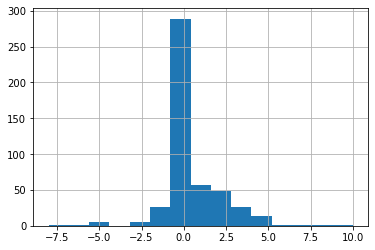

In [ ]:
dfsent=pd.read_csv("sentiment2.csv")
dfsent.sentpolari.hist(bins=15)

In [ ]:
df2.to_csv('exploded2.csv')

In [ ]:
df2["User type"].value_counts()

Business association                   181
Company/business organisation          104
Non-governmental organisation (NGO)     44
Academic/research Institution           31
Other                                   17
Trade union                             13
Consumer organisation                    6
EU citizen                               2
Name: User type, dtype: int64

In [ ]:
labels_as_list = df[df.About_labels.notna()].About_labels.tolist()

In [103]:
labels_sentences = df[df["Transparency register number"].notna()].About_labels.str.split(r'[.]|\n').explode("About_labels")

In [ ]:
fulltext_sentences = df[df["Transparency register number"].notna()].Fulltext.str.split(r'[.]|\n').explode("Fulltext")

In [ ]:
fulltext_preprocessed, fulltext_lemmas, fulltext_vocab1, fulltext_vocab2, fulltext_cloud_df = preprocess(fulltext_sentences, "english")

  0%|          | 0/25916 [00:00<?, ?it/s]

In [104]:
labels_sentences = df[df["Transparency register number"].isna()].About_labels.str.split(r'[.]|\n').explode("About_labels")

In [ ]:
labels_preprocessed, labels_lemmas, labels_vocab1, labels_vocab2, labels_cloud = preprocess(df.About_labels.to_list(), "english")

  0%|          | 0/154 [00:00<?, ?it/s]

In [ ]:
labels_preprocessed, labels_lemmas, labels_vocab1, labels_vocab2, cloud_df = preprocess(labels_sentences, "english")


AttributeError: 'float' object has no attribute 'lower'

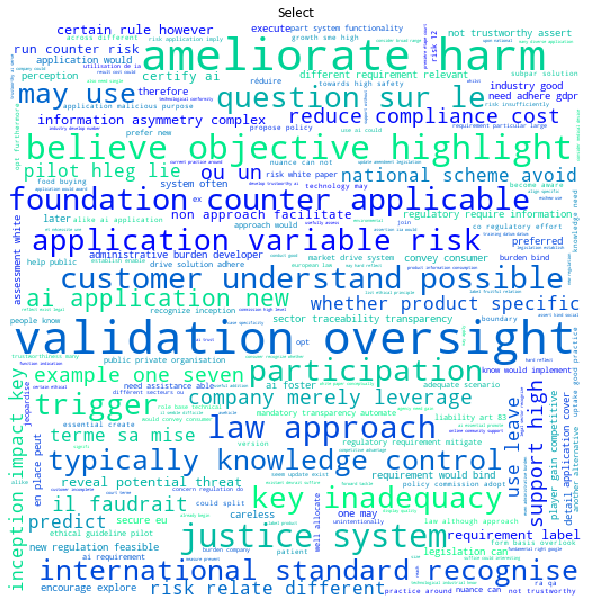

In [ ]:
# NO TRANSP NUMBER

word_cloud = WordCloud(width = 512, height = 512, background_color='white', colormap="winter").generate_from_frequencies(labels_cloud)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Select')
plt.show()

In [ ]:
#TRANSPARENCY (1,3)

word_cloud = WordCloud(width = 1024, height = 1024, background_color='white', colormap="copper").generate_from_frequencies(cloud_df)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Select')
plt.show()

In [ ]:
# vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=vocabulary_size, max_df=0.25) CELUI CI EST OK


word_cloud = WordCloud(width = 512, height = 512, background_color='white').generate_from_frequencies(cloud_df)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Select')
plt.show()

NameError: name 'WordCloud' is not defined

In [ ]:
df["Fulltext_lemmas"] = pd.Series(fulltext_lemmas)
df["Label_lemmas"] = pd.Series(label_lemmas)

In [ ]:
df.to_csv('data_EU_prepro.csv')

### Wordclouds

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import *
import requests

from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk import word_tokenize
nltk.download('punkt')
from gensim.parsing.preprocessing import remove_stopwords

import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GGB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
word_cloud = WordCloud(width = 512, height = 512, background_color='white', mask=circle_mask).generate(elecleft)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('American Elections query (Alt Left)')
plt.show()

### BERT/TRANSFORMERS

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
  
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-span-sentiment-extraction")
model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-span-sentiment-extraction")

def get_sentiment_span(text):
  input_ids = tokenizer.encode(text, return_tensors="pt", add_special_tokens=True)  # Batch size 1

  generated_ids = model.generate(input_ids=input_ids, num_beams=1, max_length=80).squeeze()

  predicted_span = tokenizer.decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)

  return predicted_span

get_sentiment_span("question: negative context: My bike was put on hold...should have known that.... argh total bummer")

# output: 'argh total bummer'

get_sentiment_span("question: positive context: On the monday, so i wont be able to be with you! i love you")

### LSTM

In [ ]:
data = pd.read_csv('../input/Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re


### LDA

In [ ]:
#libraries datascience
import pandas as pd
import os
import numpy as np
import pickle
from tqdm import tqdm

In [ ]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import ldamodel 

In [ ]:
lda_text = list(map(lambda x : x.split(), fulltext_lemmas))

id2word = Dictionary(lda_text)
texts = lda_text
corpus = [id2word.doc2bow(text) for text in texts]

lda_model = ldamodel.LdaModel(
   corpus=corpus, id2word=id2word, num_topics=50, passes=150, alpha='auto', per_word_topics=True, iterations=500
)

In [ ]:
lda_topics = []
for i in range(50):
    t = [w[0] for w in lda_model.show_topic(i)[0:10]]
    lda_topics.append(t)
lda_topics

### BERTOPIC

In [ ]:
model = BERTopic(nr_topics=50)
topics, _ = model.fit_transform(df.About_labels.to_list())